# Visualización de Mapas II

## Librería OSMNX

```{admonition} ¿Qué es OSMNX?
<div align="justify"><strong>OSMnx</strong>  es un paquete de Python que permite descargar, modelar, analizar y visualizar fácilmente redes de calles y otras características geoespaciales de OpenStreetMap. Puedes descargar y modelar redes para caminar, conducir o andar en bicicleta con una sola línea de código, y luego analizarlas y visualizarlas. De la misma manera, puedes trabajar con servicios urbanos/puntos de interés, huellas de edificios, paradas de tránsito, datos de elevación, orientaciones de calles, velocidad/tiempo de viaje y enrutamiento.</div>
```

### Creación de Mapa con OSMNX

#### Instalar Bibliotecas

In [ ]:
# Si necesitas instalar: pip install osmnx

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt

#### Consultar por una ciudad específica: Puerto Montt

In [19]:
city = 'Puerto Montt, Chile'
admin = ox.geocode_to_gdf(city)

In [20]:
# Descarga la red caminera  y transformala en gdf
G = ox.graph_from_polygon(admin.geometry.to_list()[0])
G = ox.project_graph(G)  # Proyecta el gráfico con mayor precisión. 
nodes, edges = ox.graph_to_gdfs(G)

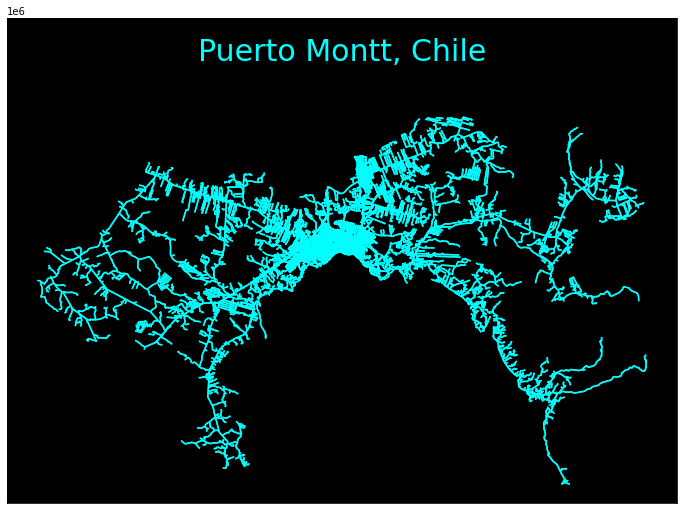

In [26]:
# Visualiza con matplotlib
electric_blue = "#00FFFF"
color_bcg = '#000000'

f, ax = plt.subplots(1, 1, figsize=(12, 12))
edges.plot(ax=ax, color=electric_blue)
ax.set_facecolor(color_bcg)

# Elimina los ticks
for xlabel_i in ax.get_xticklabels():
    xlabel_i.set_visible(False)
for ylabel_i in ax.get_yticklabels():
    ylabel_i.set_visible(False)
for tick in ax.get_xticklines():
    tick.set_visible(False)
for tick in ax.get_yticklines():
    tick.set_visible(False)

    # Agrega el Titulo
ymin, ymax = plt.ylim()
extension = 0.2 * (ymax - ymin)
ax.set_ylim(ymin, ymax + extension)
ax.set_title(city, fontsize=30, color=electric_blue, y=0.9)

# Guarda el mapa como imagen (opcional)
plt.savefig('city_map_PM.png', bbox_inches='tight', dpi=300)

plt.show()

```{admonition} Importante
:class: tip, dropdown
[Recuerda revisar Matplotlib para los colores] (https://matplotlib.org/stable/gallery/color/named_colors.html)
```

## Librería Geopandas

```{admonition} ¿Qué es Geopandas?
<div align="justify"><strong>OGeoPandas</strong>   es un proyecto de código abierto para facilitar el trabajo con datos geoespaciales en Python. GeoPandas extiende los tipos de datos utilizados por pandas para permitir operaciones espaciales en tipos geométricos. Las operaciones geométricas son realizadas por Shapely. GeoPandas además depende de PyOGRIO para acceso a archivos y de Matplotlib para graficar.</div>
```

### Creación de Mapa con Geopandas

```{admonition} ¿Qué  son los archivos Shapely (shp)?
<div align="justify"> Un <strong>shapefile</strong> es un formato sencillo y no topológico que se utiliza para almacenar la ubicación geométrica y la información de atributos de las entidades geográficas. Las entidades geográficas de un shapefile se pueden representar por medio de puntos, líneas o polígonos (áreas). El espacio de trabajo que contiene shapefiles también puede contener tablas dBASE que, a su vez, pueden almacenar atributos adicionales que se pueden unir a las entidades de un shapefile.</div>
```

#### Ejemplo 1: Mapa de Areas Pobladas de Chile

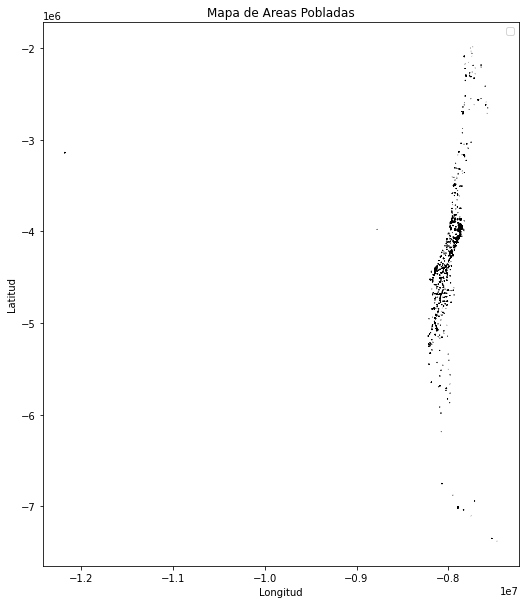

In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt

try:
    # Cargar un archivo de forma geoespacial (shapefile)
    world = gpd.read_file('Areas_Pobladas.shp')
    
    # Visualizar el mapa
    fig, ax = plt.subplots(figsize=(10, 10))  # Tamaño de la figura
    world.plot(ax=ax, edgecolor='k', facecolor='none')  # Personalización de colores y bordes
    ax.set_title('Mapa de Areas Pobladas')  # Agregar título al mapa
    ax.set_xlabel('Longitud')  # Etiqueta del eje x
    ax.set_ylabel('Latitud')  # Etiqueta del eje y
    ax.legend(['Provincias'])  # Agregar leyenda si es relevante
    
    plt.show()

#Manejo de excepciones: try-except para manejar posibles errores.

except FileNotFoundError:
    print("Error: Archivo no encontrado.")
except ValueError:
    print("Error: No se pudo cargar el archivo shapefile.")
except Exception as e:
    print("Ocurrió un error:", e)


#### Ejemplo 2: Áreas Silvestres Protegidas

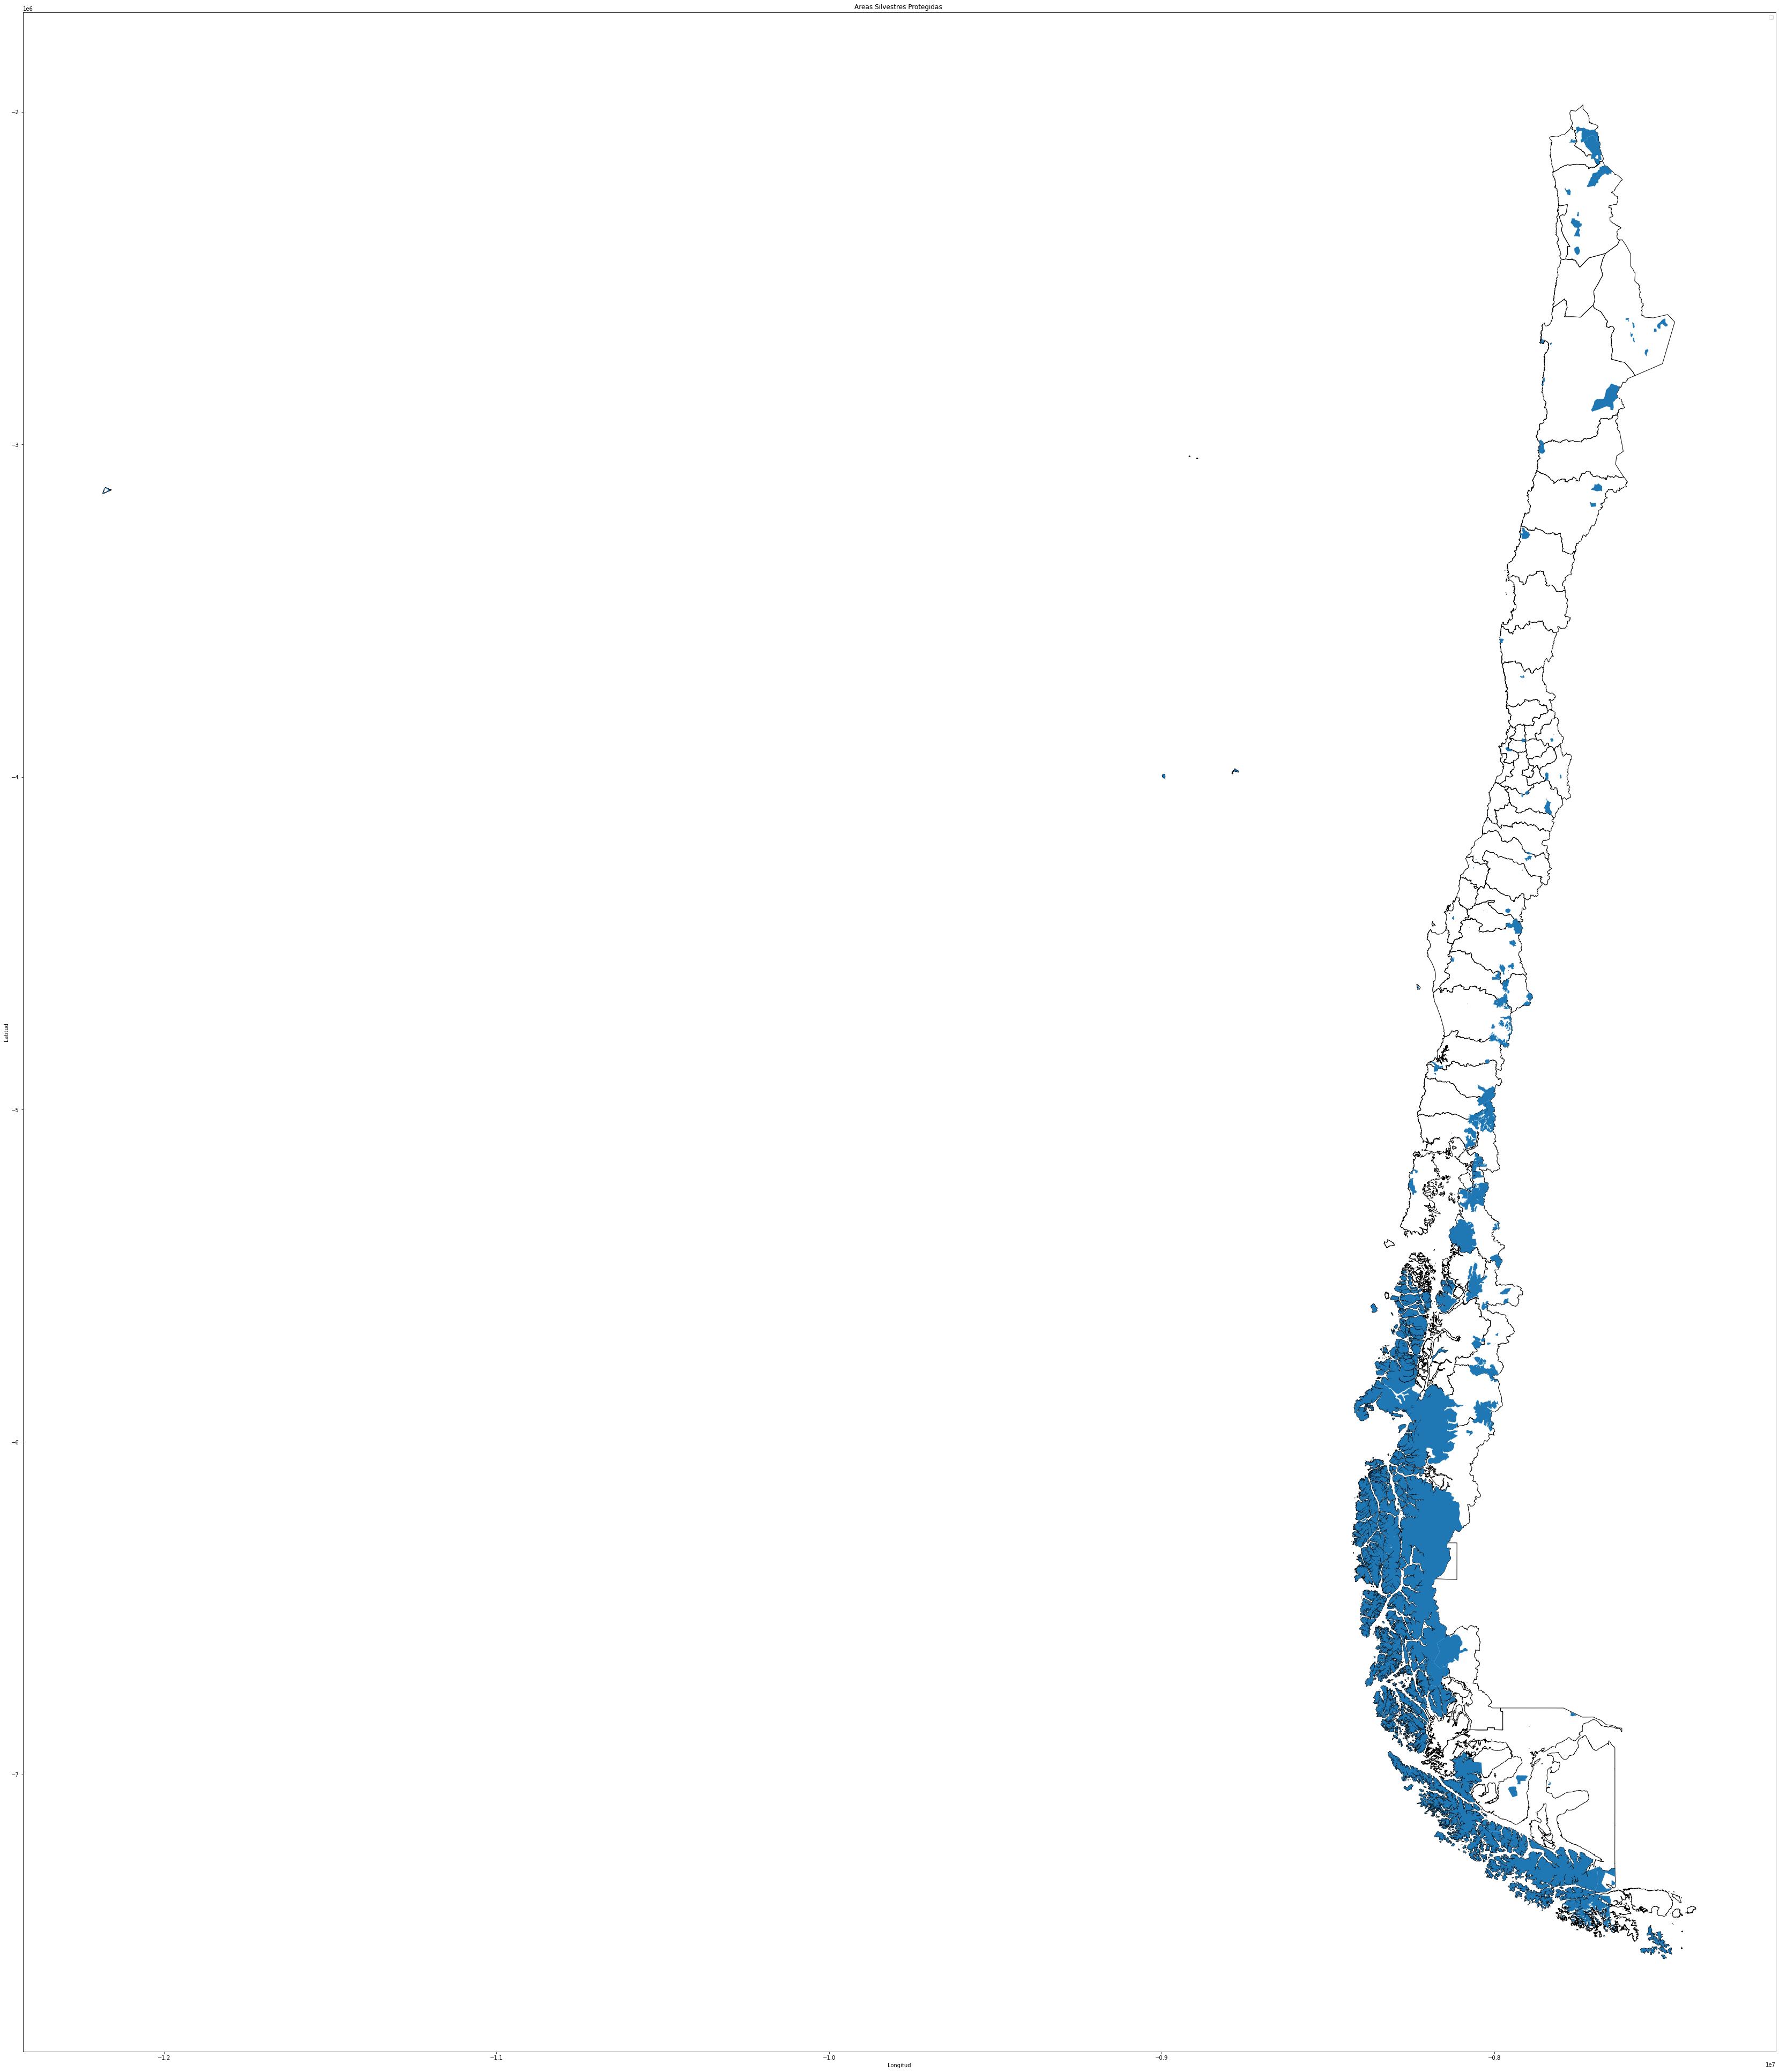

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geoespaciales
gdf = gpd.read_file('snaspe.shx')

# Especificar el tamaño de la figura (ancho x alto) en pulgadas
fig, ax = plt.subplots(figsize=(10, 10))  # Tamaño de la figura
world.plot(ax=ax, edgecolor='k', facecolor='none')  # Personalización de colores y bordes
ax.set_title('Areas Silvestres Protegidas', fontsize=30)  # Agregar título al mapa
ax.set_xlabel('Longitud')  # Etiqueta del eje x
ax.set_ylabel('Latitud')  # Etiqueta del eje y
ax.legend(['Snaspe'])  # Agregar leyenda si es relevante

# Visualizar el mapa
gdf.plot(ax=ax)
plt.show()


```{admonition} Importante
:class: tip, dropdown
Para obtener archivos en formato shapefile te sugiero revisar las siguentes web:

- [Mapas Vectoriales de Chile del Banco Central](https://www.bcn.cl/siit/mapas_vectoriales)

- [Geoportal de Chile del Ministerio de Bienes Nacionales](https://www.ide.cl)

- [Natural Earth Data](https://www.naturalearthdata.com)

- [USGS Earth Explorer](https://earthexplorer.usgs.gov)

- [Global Climate Monitor](https://www.globalclimatemonitor.org/#)
```

#### Ejemplo 3: Aeropuertos y Aeródromos de Chile

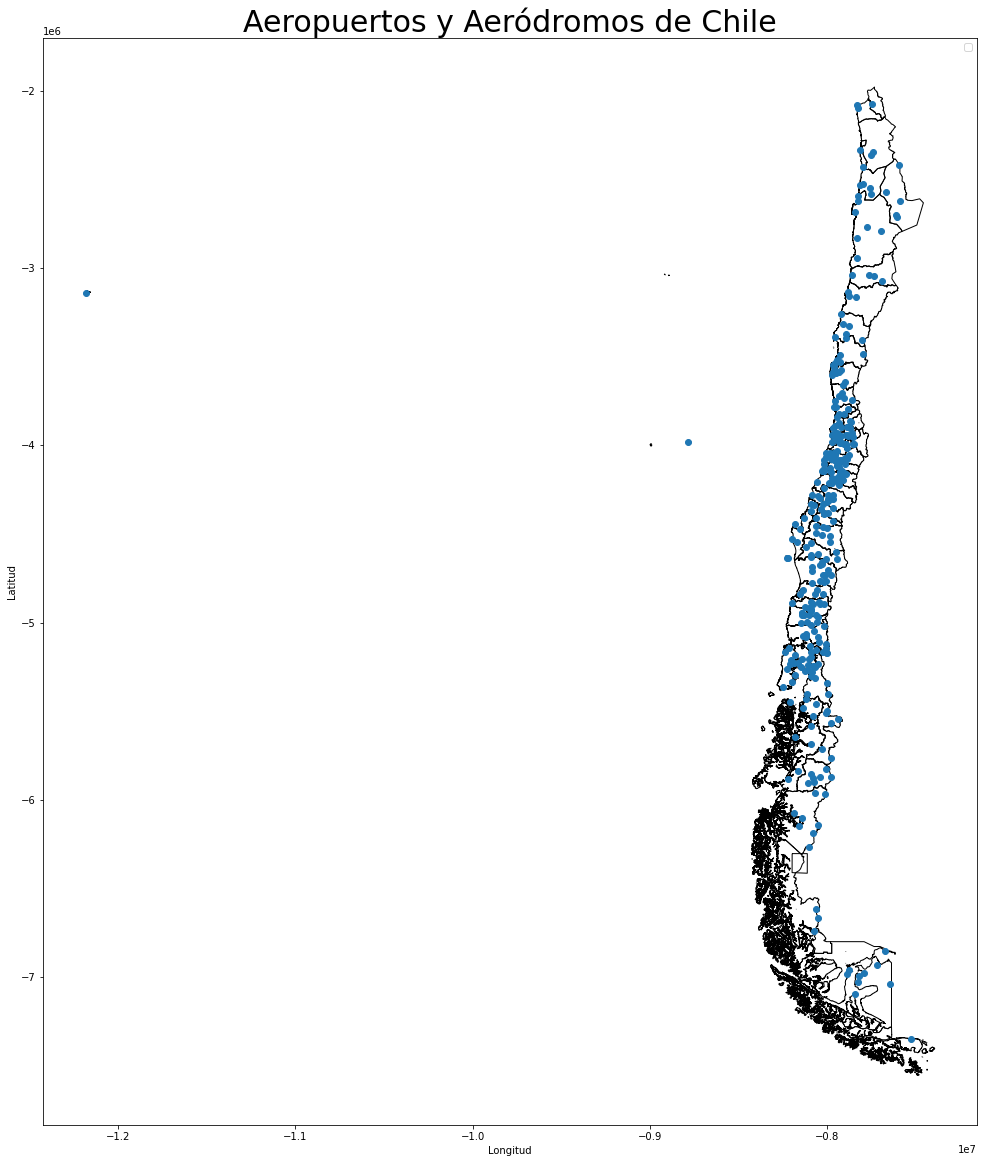

In [51]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geoespaciales
gdf = gpd.read_file('Aeropuertos.shp')

# Especificar el tamaño de la figura (ancho x alto) en pulgadas
fig, ax = plt.subplots(figsize=(20, 20))  # Ajusta los valores según tus preferencias
world.plot(ax=ax, edgecolor='k', facecolor='none')  # Personalización de colores y bordes
ax.set_title('Aeropuertos y Aeródromos de Chile', fontsize=20)  # Agregar título al mapa
ax.set_xlabel('Longitud')  # Etiqueta del eje x
ax.set_ylabel('Latitud')  # Etiqueta del eje y
ax.legend(['Aeropuertos'])  # Agregar leyenda si es relevante

# Visualizar el mapa
gdf.plot(ax=ax)
plt.show()


#### Ejemplo 4: Topónimos 

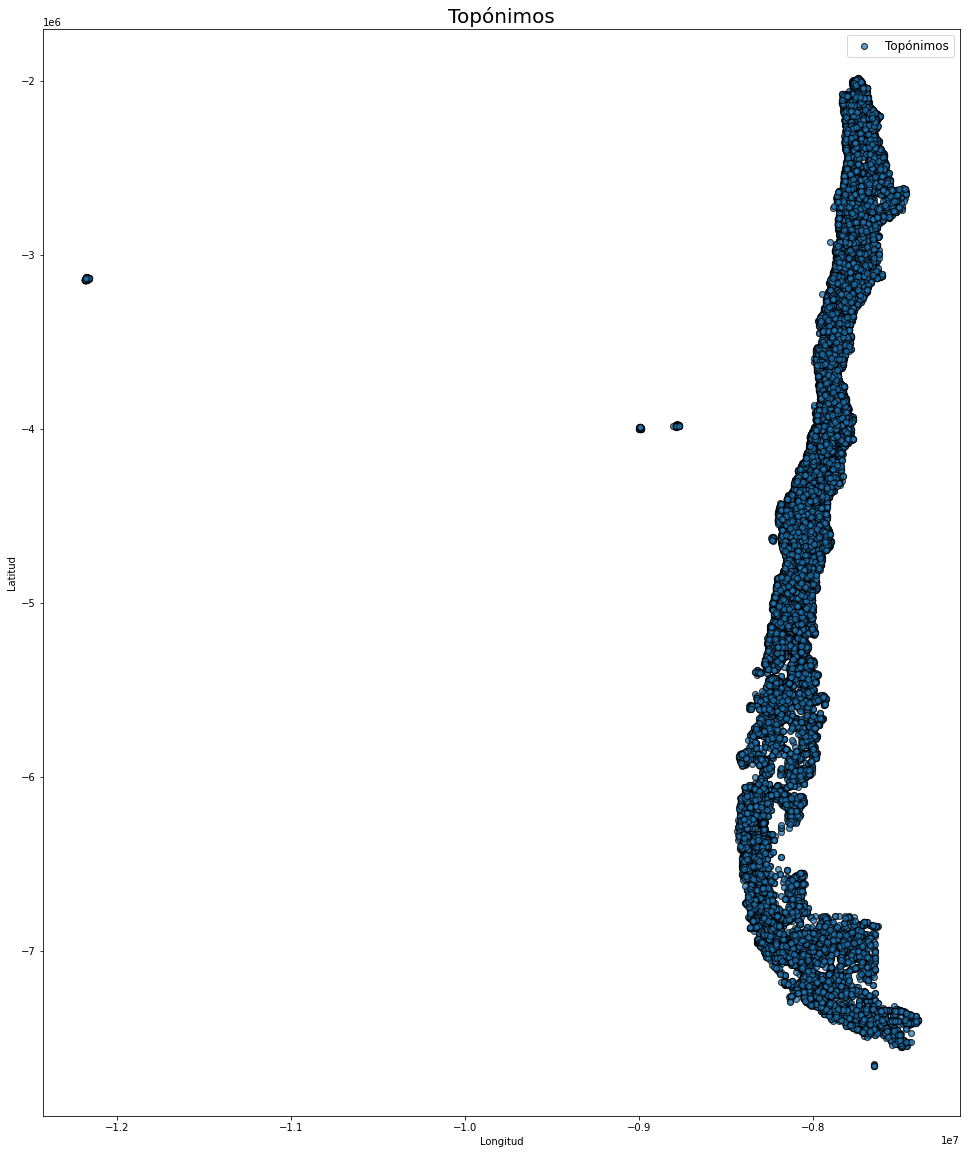

In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar datos geoespaciales
gdf = gpd.read_file('Toponimos.shp')

# Especificar el tamaño de la figura (ancho x alto) en pulgadas
fig, ax = plt.subplots(figsize=(20, 20))  # Ajusta los valores según tus preferencias

# Personalización de colores y bordes para gdf
gdf.plot(ax=ax, edgecolor='k', linewidth=1.2, alpha=0.7)

# Agregar título al mapa con tamaño de fuente personalizado
ax.set_title('Topónimos', fontsize=20)

# Agregar leyenda si es relevante
ax.legend(['Topónimos'], fontsize='large')

# Etiquetas de los ejes
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

plt.show()
